In [1]:
# Cell 1: Importing Required Libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

# In this cell, we import the necessary libraries for our code.
# - `numpy` is a library for numerical computations in Python.
# - `matplotlib.pyplot` is a library for creating visualizations and plots.
# - `cv2` is the OpenCV library, which provides computer vision functions.
# - `math` is a built-in Python library for mathematical operations.

image size (442, 344)


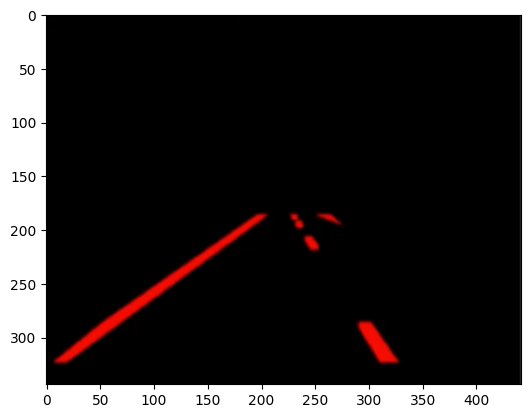

In [2]:
# Cell 2: Loading and Displaying Image
# Changed the provided code with a global variable to change the image
# path once instead of multiple times (fewer mistakes)
img_path = "/content/img_3.png"
img = cv2.imread(img_path)  # Read the image from the specified file path
img_size = (img.shape[1], img.shape[0])  # Get the size of the image (width, height)
print("image size", img_size)
plt.imshow(img)  # Display the image using matplotlib's imshow function

# In this cell, we load an image from a file path using OpenCV's `imread` function.
# - The image file path is "/content/img_1.png".
# - The loaded image is stored in the variable `img`.
# - We also obtain the size of the image using the `shape` attribute of the image array.
# - Finally, we display the loaded image using `plt.imshow`, which is a function from matplotlib.

src [[176.8  192.64]
 [265.2  192.64]
 [433.16 321.64]
 [  8.84 321.64]]
dst [[ 66.3   0. ]
 [375.7   0. ]
 [375.7 344. ]
 [ 66.3 344. ]]


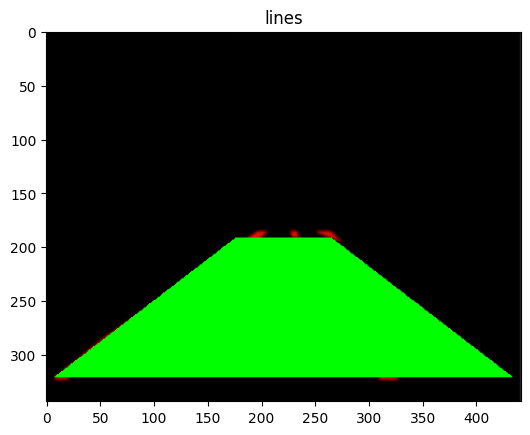

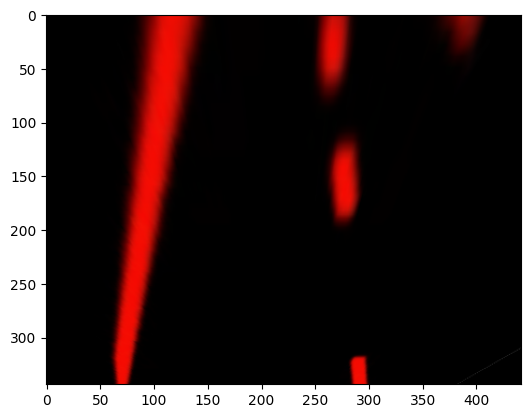

In [3]:

# Cell 3: Perspective Transformation

# Define the parameters for perspective transformation
bot_width = 0.96  # Width of the bottom edge of the perspective trapezoid
mid_width = 0.2 # Width of the middle edge of the perspective trapezoid
height_pct = 0.56  # Height of the perspective trapezoid as a percentage of the image height
bottom_trim = 0.935  # Trimming percentage from the bottom of the image

# Calculate the offset for the destination points based on image width
offset = img_size[0] * 0.15

# Define the source and destination points for the perspective transformation
src = np.float32([
    [img.shape[1] * (0.5 - mid_width / 2), img.shape[0] * height_pct],
    [img.shape[1] * (0.5 + mid_width / 2), img.shape[0] * height_pct],
    [img.shape[1] * (0.5 + bot_width / 2), img.shape[0] * bottom_trim],
    [img.shape[1] * (0.5 - bot_width / 2), img.shape[0] * bottom_trim]
])
print("src", src)

dst = np.float32([
    [offset, 0],
    [img_size[0] - offset, 0],
    [img_size[0] - offset, img_size[1]],
    [offset, img_size[1]]
])

print("dst", dst)

# Uncomment the following lines to test and visualize the src points on the image
img_with_polygon = img.copy()
cv2.fillConvexPoly(img_with_polygon, src.astype('int32'), (0, 255, 0))
plt.imshow(img_with_polygon)
plt.title('lines')
plt.show()

# Create a perspective transformation matrix using the source and destination points
M = cv2.getPerspectiveTransform(src, dst)

# Apply the perspective transformation to the image using the transformation matrix
warped_img = cv2.warpPerspective(img, M, (img_size[0], img_size[1]))

plt.imshow(warped_img)

# In this cell, we perform a perspective transformation on the image.
# - We define the parameters for the perspective transformation, such as the widths and heights of the trapezoid.
# - We calculate the offset for the destination points based on the image width.
# - We define the source and destination points for the transformation.
# - Optionally, we can uncomment the lines to visualize the source points on the image.
# - We create a perspective transformation matrix using the source and destination points.
# - We apply the perspective transformation to the image using the transformation matrix.
# - Finally, we display the transformed image using `plt.imshow`.

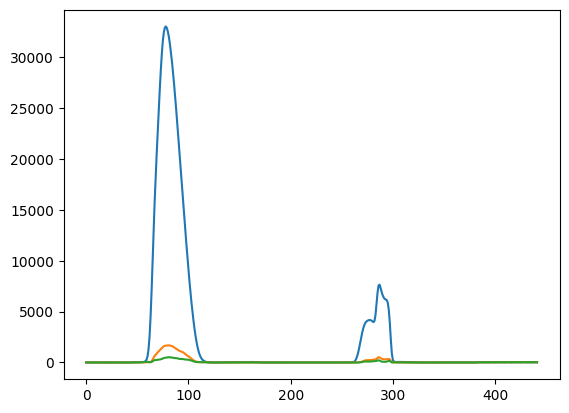

In [4]:
# Cell 4: Computing and Plotting Histogram

# Compute the histogram by summing pixel values along the vertical axis of the transformed image
histogram = np.sum(warped_img[int(warped_img.shape[0] / 2):, :], axis=0)

# Plot the histogram
plt.plot(histogram)
plt.show()

# In this cell, we compute the histogram of the transformed image.
# - We sum the pixel values along the vertical axis of the transformed image, starting from the middle of the image.
# - The resulting histogram represents the distribution of pixel values across the horizontal axis.
# - We plot the histogram using `plt.plot` and display it using `plt.show`.

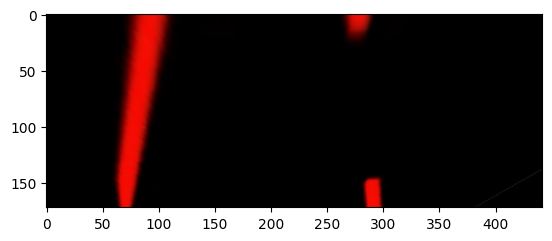

In [5]:
# Cell 5: Displaying Cropped Transformed Image

# Display the cropped transformed image
plt.imshow(warped_img[int(warped_img.shape[0] / 2):, :])

# In this cell, we display the cropped transformed image.
# - We use array slicing to crop the transformed image from the middle of the image height to the bottom.
# - We display the cropped image using `plt.imshow`.

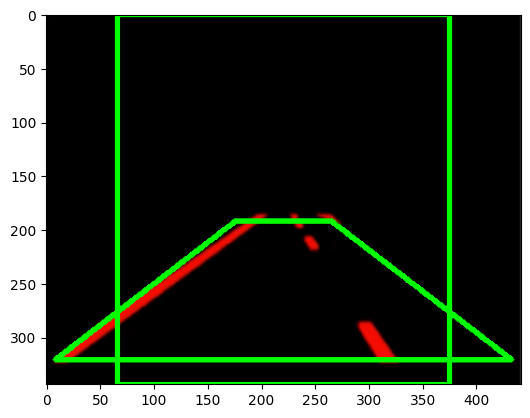

In [6]:
# Cell 6: Edge Detection and Contour Finding

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to detect edges in the grayscale image
edged = cv2.Canny(gray.copy(), 30, 200)

# Wait for a key press (optional)
cv2.waitKey(0)

# Finding contours in the grayscale image
# Note: We use a copy of the image (e.g., edged.copy()) as findContours modifies the image
contours, hierarchy = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = img.copy()

# Draw the source and destination contours on the image using green color (0, 255, 0) and thickness of 3
# cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 3)

cv2.drawContours(img, [src.astype(int)], -1, (0, 255, 0), 3)
cv2.drawContours(img, [dst.astype(int)], -1, (0, 255, 0), 3)

# Display the image with contours
plt.imshow(img)

# In this cell, we perform edge detection and contour finding on the image.
# - We convert the image to grayscale using `cv2.cvtColor`.
# - We apply the Canny edge detection algorithm to detect edges in the grayscale image.
# - Optionally, we can use `cv2.waitKey(0)` to wait for a key press before proceeding (useful when displaying images in OpenCV).
# - We find contours in the grayscale image using `cv2.findContours`.
# - We draw the source and destination contours on the image using `cv2.drawContours`.
# - Finally, we display the image with contours using `plt.imshow`.

In [7]:
# Function: Drawing Lanes

def draw_lanes(img, left_fit, right_fit, middle_fit):
    """
    Draw the detected lanes on the image.

    Parameters:
    - img: The original image
    - left_fit: The coefficients of the left lane polynomial
    - right_fit: The coefficients of the right lane polynomial
    - middle_fit: The coefficients of the middle lane polynomial

    Returns:
    - inv_perspective: The image with drawn lanes in the original perspective
    - newwarp: The image with drawn lanes in the transformed perspective
    """

    # Generate y-values for plotting the lanes
    ploty = np.linspace(0, img.shape[0] - 1, img.shape[0])

    # Create a blank color image
    color_img = np.zeros_like(img)
    # Generate points for the left lane
    left = np.array([np.transpose(np.vstack([left_fit, ploty]))])

    # Generate points for the right lane (reversed for drawing purposes)
    right = np.array([np.flipud(np.transpose(np.vstack([right_fit, ploty])))])

    # Generate points for the middle lane
    mid_1 = np.array([np.transpose(np.vstack([middle_fit, ploty]))])

    # Generate points for the middle lane (reversed for drawing purposes)
    mid_2 = np.array([np.flipud(np.transpose(np.vstack([middle_fit, ploty])))])

    # Concatenate points to create the left and right lane polygons
    points_l = np.hstack((left, mid_2))
    points_r = np.hstack((mid_1, right))

    # Fill the left lane polygon with green color
    cv2.fillPoly(color_img, np.int_(points_l), (0, 255, 0))

    # Fill the right lane polygon with red color
    cv2.fillPoly(color_img, np.int_(points_r), (0, 0, 255))

    # Draw the middle lane contour with blue color
    cv2.drawContours(color_img, [mid_1.reshape((img.shape[0], 2)).astype(int)], 0, (255, 0, 0), 10)

    # Define the perspective transformation parameters for the inverse transformation
    bot_width = 0.96
    mid_width = 0.2
    height_pct = 0.57
    bottom_trim = 0.935
    offset = img_size[0] * 0.15

    dst = np.float32([[img.shape[1] * (0.5 - mid_width / 2), img.shape[0] * height_pct],
                      [img.shape[1] * (0.5 + mid_width / 2), img.shape[0] * height_pct],
                      [img.shape[1] * (0.5 + bot_width / 2), img.shape[0] * bottom_trim],
                      [img.shape[1] * (0.5 - bot_width / 2), img.shape[0] * bottom_trim]])

    src = np.float32([[offset, 0],
                      [img_size[0] - offset, 0],
                      [img_size[0] - offset, img_size[1]],
                      [offset, img_size[1]]])

    # Get the inverse perspective transformation matrix
    Minv = cv2.getPerspectiveTransform(src, dst)

    # Warp the color image with lanes back to the original perspective
    newwarp = cv2.warpPerspective(color_img, Minv, (img.shape[1], img.shape[0]))

    # Add the color image with lanes to the original image with blending
    inv_perspective = cv2.addWeighted(img, 1, newwarp, 0.7, 0)

    # Generate a mask based on the lanes in the transformed perspective
    mask = (newwarp[:, :, 0] == 255).astype(float) * 255

    # Find the nonzero coordinates in the mask
    nonzero = mask.nonzero()

    # Set the properties for drawing a circle on the image
    radius = 2
    color = (255, 255, 255)
    thickness = 20
    center_coordinates = (nonzero[1][0], nonzero[0][0])

    # Draw a circle on the image at the center of the lane
    inv_perspective = cv2.circle(inv_perspective, center_coordinates, radius, color, thickness)

    # Return the images with drawn lanes
    return inv_perspective, newwarp

# This function takes the original image, coefficients of the left, right, and middle lane polynomials as input.
# It performs the following steps:
# - Generates y-values for plotting the lanes.
# - Creates a blank color image to draw the lanes.
# - Generates points for the left, right, and middle lanes.
# - Concatenates the points to create the left and right lane polygons.
# - Fills the left lane polygon with green color and the right lane polygon with red color.
# - Draws the middle lane contour with blue color.
# - Defines the perspective transformation parameters for the inverse transformation.
# - Computes the inverse perspective transformation matrix.
# - Warps the color image with lanes back to the original perspective using the inverse transformation.
# - Adds the color image with lanes to the original image with blending.
# - Generates a mask based on the lanes in the transformed perspective.
# - Finds the nonzero coordinates in the mask.
# - Sets the properties for drawing a circle on the image.
# - Draws a circle on the image at the center of the lane.
# - Returns the images with drawn lanes.


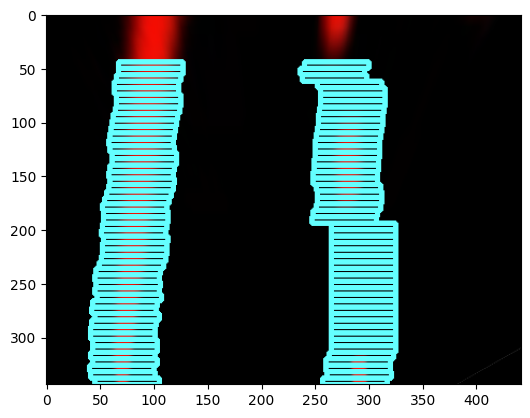

In [8]:
# Initialize empty lists to store coefficients of left lane line polynomial (left_a, left_b, left_c) and right lane line polynomial (right_a, right_b, right_c)
left_a, left_b, left_c = [],[],[]
right_a, right_b, right_c = [],[],[]

# Create empty numpy arrays to store averaged polynomial coefficients
left_fit_ = np.empty(3)
right_fit_ = np.empty(3)

# Read the image
img = cv2.imread(img_path)

# Get the size of the image
img_size = (img.shape[1], img.shape[0])

# Set parameters for perspective transformation
bot_width = .96
mid_width = .2
height_pct = .57
bottom_trim = .935
offset = img_size[0] * .15

# Define source and destination points for perspective transformation
src = np.float32([[img.shape[1] * (.5 - mid_width/2), img.shape[0] * height_pct],
                  [img.shape[1] * (.5 + mid_width/2), img.shape[0] * height_pct],
                  [img.shape[1] * (.5 + bot_width/2), img.shape[0] * bottom_trim],
                  [img.shape[1] * (.5 - bot_width/2), img.shape[0] * bottom_trim]])
dst = np.float32([[offset, 0],
                  [img_size[0] - offset, 0],
                  [img_size[0] - offset, img_size[1]],
                  [offset, img_size[1]]])

# Calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(src, dst)

# Apply perspective transformation to the image
wraped_img = cv2.warpPerspective(img, M, (img_size[0], img_size[1]))

# Create a copy of the transformed image
out_img = wraped_img[:, :].copy()

# Create a binary copy of the transformed image
binary_warped = out_img.copy()

# Define a function to calculate the histogram of the bottom half of the image
def get_hist(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = np.sum(gray[int(img.shape[0] / 2):, :], axis=0)
    return hist

# Calculate the histogram of the transformed image
histogram = get_hist(wraped_img)

# Find the midpoint of the histogram
midpoint = int(histogram.shape[0] / 2)

# Find the starting x-coordinate of the left lane line
leftx_base = np.argmax(histogram[:midpoint])

# Find the starting x-coordinate of the right lane line
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 50

# Set height of windows
window_height = int(binary_warped.shape[0] / nwindows)

# Get the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Initialize the current x positions for the left and right windows
leftx_current = leftx_base
rightx_current = rightx_base

# Set the width of the windows +/- margin
margin = 30

# Set the minimum number of pixels found to recenter the window
minpix = 50

# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Flag to determine whether to draw window rectangles
draw_windows = True

# Iterate through each window
for window in range(nwindows):
    # Identify window boundaries in y-direction
    win_y_low = binary_warped.shape[0] - (window+1) * window_height
    win_y_high = binary_warped.shape[0] - window * window_height

    # Identify window boundaries in x-direction for left and right lanes
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin

    # Draw the windows on the visualization image if draw_windows is True
    if draw_windows == True:
        cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (100, 255, 255), 3)
        cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high), (100, 255, 255), 3)

    # Identify the nonzero pixels within the current window for left and right lanes
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

    # Append the indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)

    # If the number of pixels found is greater than minpix, recenter the next window
    if len(good_left_inds) > minpix:
        leftx_current = int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:
        rightx_current = int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds]
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]

# Fit a second order polynomial to each lane line
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Append the coefficients to the respective lists
left_a.append(left_fit[0])
left_b.append(left_fit[1])
left_c.append(left_fit[2])

right_a.append(right_fit[0])
right_b.append(right_fit[1])
right_c.append(right_fit[2])

# Calculate the average of the last 10 coefficients for left and right lanes
left_fit_[0] = np.mean(left_a[-10:])
left_fit_[1] = np.mean(left_b[-10:])
left_fit_[2] = np.mean(left_c[-10:])

right_fit_[0] = np.mean(right_a[-10:])
right_fit_[1] = np.mean(right_b[-10:])
right_fit_[2] = np.mean(right_c[-10:])

# Generate y values for plotting
ploty = np.linspace(0, img.shape[0] - 1, img.shape[0])

# Display the output image with drawn window rectangles
plt.imshow(out_img)


# Steps:
# 1. Initialize empty lists for storing polynomial coefficients for the left and right lane lines.
# 2. Create empty numpy arrays to store averaged polynomial coefficients.
# 3. Read the image using cv2.imread.
# 4. Get the size of the image.
# 5. Set parameters for perspective transformation.
# 6. Define source and destination points for perspective transformation.
# 7. Calculate the perspective transformation matrix using cv2.getPerspectiveTransform.
# 8. Apply perspective transformation to the image using cv2.warpPerspective.
# 9. Create copies of the transformed image for further processing.
# 10. Define a function to calculate the histogram of the bottom half of the image.
# 11. Calculate the histogram of the transformed image.
# 12. Find the midpoint of the histogram.
# 13. Identify the starting x-coordinates of the left and right lane lines based on the histogram.
# 14. Set parameters for sliding windows.
# 15. Get the x and y positions of all nonzero pixels in the image.
# 16. Initialize current x positions for the left and right windows.
# 17. Set the width of the windows and the minimum number of pixels to recenter the window.
# 18. Create empty lists to receive left and right lane pixel indices.
# 19. Iterate through each window to identify the nonzero pixels within the window and recenter the next window if enough pixels are found.
# 20. Concatenate the arrays of indices for left and right lane pixels.
# 21. Extract left and right line pixel positions.
# 22. Fit a second-order polynomial to each lane line.
# 23. Append the polynomial coefficients to the respective lists.
# 24. Calculate the average of the last 10 coefficients for left and right lanes.
# 25. Generate y values for plotting.
# 26. Display the output image with drawn window rectangles.


' These lines calculate the x-coordinate values for the left and right lane lines based on the averaged coefficients (left_fit_ and right_fit_).\nThen, scatter plots are created to visualize the points where the calculated x-coordinate values intersect with the corresponding y-coordinate values (ploty). '

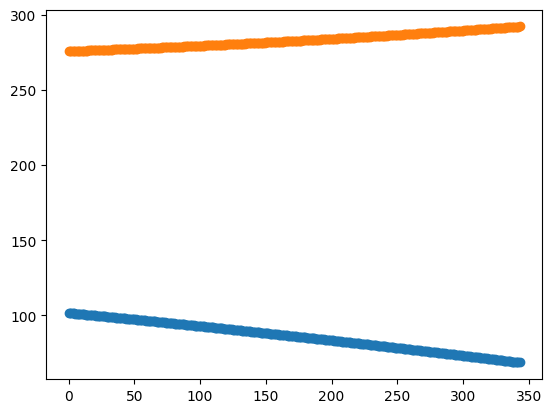

In [9]:
# Generate y values for plotting
ploty = np.linspace(0, img.shape[0] - 1, img.shape[0])

# Calculate the x values for the left and right lines using the averaged coefficients
left_fitx = left_fit_[0] * ploty ** 2 + left_fit_[1] * ploty + left_fit_[2]
right_fitx = right_fit_[0] * ploty ** 2 + right_fit_[1] * ploty + right_fit_[2]

# Plot the x values against the y values for the left line
plt.scatter(ploty, left_fitx)

# Plot the x values against the y values for the right line
plt.scatter(ploty, right_fitx)

''' These lines calculate the x-coordinate values for the left and right lane lines based on the averaged coefficients (left_fit_ and right_fit_).
Then, scatter plots are created to visualize the points where the calculated x-coordinate values intersect with the corresponding y-coordinate values (ploty). '''

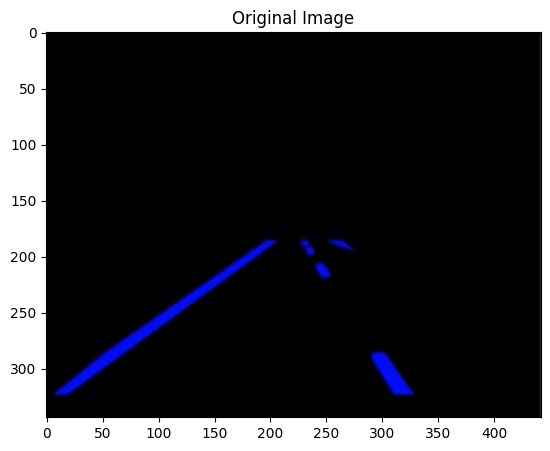

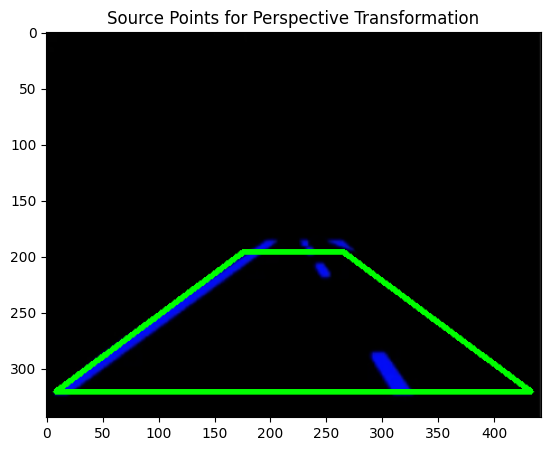

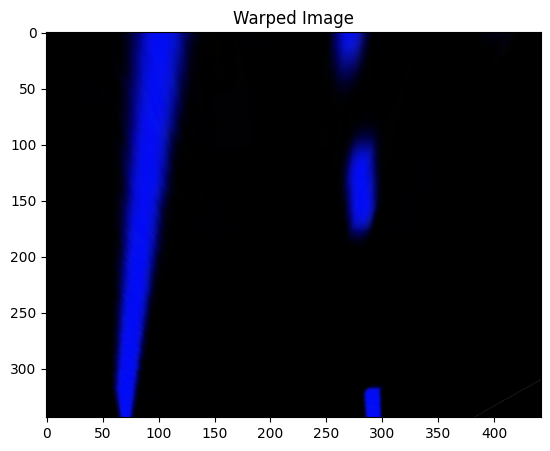

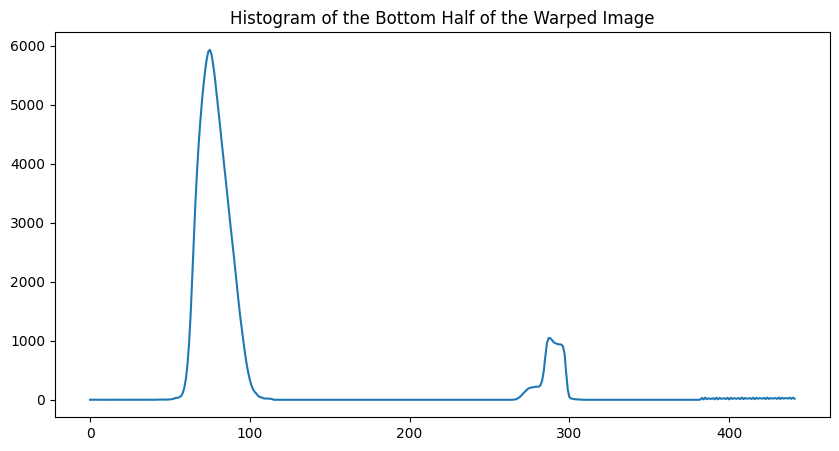

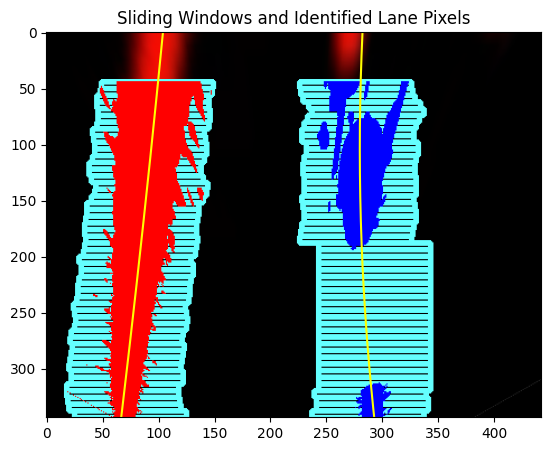

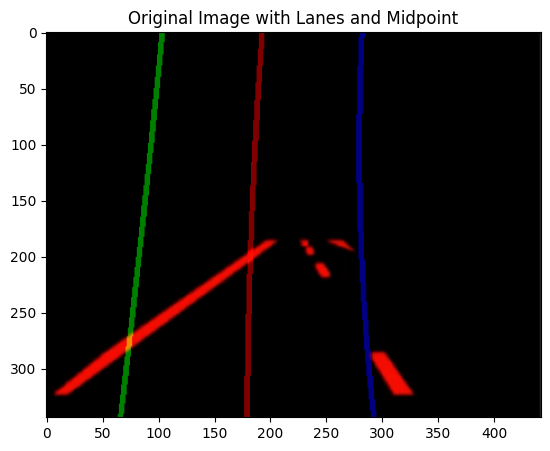

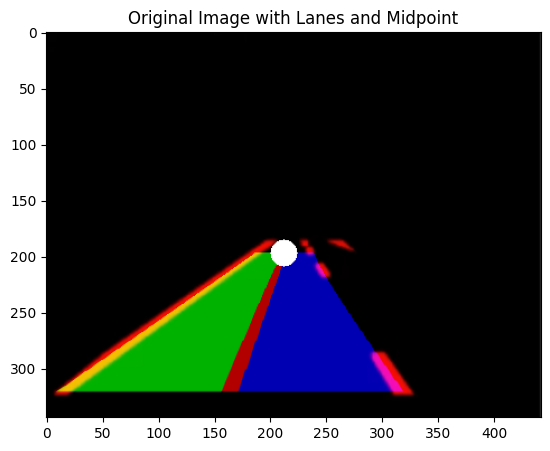

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Initialize lists to store coefficients of left and right lane line polynomials
left_a, left_b, left_c = [], [], []
right_a, right_b, right_c = [], [], []
left_fit_ = np.empty(3)
right_fit_ = np.empty(3)

# Load the image
img = cv2.imread(img_path)
img_size = (img.shape[1], img.shape[0])

# Display the original image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Set parameters for perspective transformation
bot_width = .96
mid_width = .2
height_pct = .57
bottom_trim = .935
offset = img_size[0] * .15

# Define source and destination points for perspective transformation
src = np.float32([[img.shape[1] * (.5 - mid_width / 2), img.shape[0] * height_pct],
                  [img.shape[1] * (.5 + mid_width / 2), img.shape[0] * height_pct],
                  [img.shape[1] * (.5 + bot_width / 2), img.shape[0] * bottom_trim],
                  [img.shape[1] * (.5 - bot_width / 2), img.shape[0] * bottom_trim]])
dst = np.float32([[offset, 0], [img_size[0] - offset, 0],
                  [img_size[0] - offset, img_size[1]], [offset, img_size[1]]])

# Visualize source points on the original image
img_with_src = img.copy()
cv2.polylines(img_with_src, [np.int32(src)], isClosed=True, color=(0, 255, 0), thickness=3)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_with_src, cv2.COLOR_BGR2RGB))
plt.title('Source Points for Perspective Transformation')
plt.show()

# Compute the perspective transformation matrix
M = cv2.getPerspectiveTransform(src, dst)

# Apply the perspective transformation
wraped_img = cv2.warpPerspective(img, M, (img_size[0], img_size[1]))

# Display the warped image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(wraped_img, cv2.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.show()

# Create a copy of the warped image
out_img = wraped_img[:, :].copy()

# Create a binary warped image for lane detection
binary_warped = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)

# Define a function to calculate the histogram of the bottom half of the image
def get_hist(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = np.sum(gray[int(img.shape[0] / 2):, :], axis=0)
    return hist

# Compute the histogram of the binary warped image
histogram = get_hist(wraped_img)

# Display the histogram
plt.figure(figsize=(10, 5))
plt.plot(histogram)
plt.title('Histogram of the Bottom Half of the Warped Image')
plt.show()

# Midpoint of the histogram
midpoint = int(histogram.shape[0] / 2)

# X-coordinate of the peak on the left and right sides of the histogram
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

nwindows = 50  # Number of sliding windows
window_height = int(binary_warped.shape[0] / nwindows)  # Height of each window

# Indices of nonzero pixels
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Initialize current x-coordinate for left and right lane lines
leftx_current = leftx_base
rightx_current = rightx_base

margin = 50  # Width of the windows
minpix = 50  # Minimum number of pixels to recenter window

# Lists to store indices of left and right lane pixels
left_lane_inds = []
right_lane_inds = []

# Flag to indicate whether to draw windows on the image
draw_windows = True

# Iterate through each window
for window in range(nwindows):
    # Bottom y-coordinate of the window
    win_y_low = binary_warped.shape[0] - (window + 1) * window_height
    # Top y-coordinate of the window
    win_y_high = binary_warped.shape[0] - window * window_height

    # Left and right side of the window on the x-axis
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin

    # Indices of nonzero pixels within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
                      (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
                       (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

    # Append the indices to the list
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)

    # Draw windows if flag is True
    if draw_windows:
        cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (100, 255, 255), 3)
        cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high), (100, 255, 255), 3)

    # Recenter the window based on mean x-coordinate if sufficient pixels found
    if len(good_left_inds) > minpix:
        leftx_current = int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:
        rightx_current = int(np.mean(nonzerox[good_right_inds]))

# Concatenate the indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# X and y coordinates of left and right lane pixels
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds]
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]

# Fit a second-order polynomial to left and right lane pixels
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Append the coefficients to the list
left_a.append(left_fit[0])
left_b.append(left_fit[1])
left_c.append(left_fit[2])
right_a.append(right_fit[0])
right_b.append(right_fit[1])
right_c.append(right_fit[2])

# Average the coefficients over the last 10 frames
left_fit_[0] = np.mean(left_a[-10:])
left_fit_[1] = np.mean(left_b[-10:])
left_fit_[2] = np.mean(left_c[-10:])


right_fit_[0] = np.mean(right_a[-10:])
right_fit_[1] = np.mean(right_b[-10:])
right_fit_[2] = np.mean(right_c[-10:])


# Generate y values for plotting
ploty = np.linspace(0, img.shape[0] - 1, img.shape[0])

# Calculate x values for left and right lanes
left_fitx = left_fit_[0] * ploty ** 2 + left_fit_[1] * ploty + left_fit_[2]
right_fitx = right_fit_[0] * ploty ** 2 + right_fit_[1] * ploty + right_fit_[2]

# Display the sliding windows and identified lane pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

plt.figure(figsize=(10, 5))
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.title('Sliding Windows and Identified Lane Pixels')
plt.show()

# Calculate midpoint of the lane
mid_ = np.mean([left_fitx, right_fitx], axis=0)

# Function to draw lanes and midpoint on the image
# Function to draw lanes and midpoint on the image
def draw_lanes_on_original(img, left_fitx, right_fitx, mid):
    lane_img = np.zeros_like(img)
    for i in range(len(ploty)):
        cv2.circle(lane_img, (int(left_fitx[i]), int(ploty[i])), 2, (0, 255, 0), -1)
        cv2.circle(lane_img, (int(right_fitx[i]), int(ploty[i])), 2, (0, 0, 255), -1)
        cv2.circle(lane_img, (int(mid[i]), int(ploty[i])), 2, (255, 0, 0), -1)
    return cv2.addWeighted(img, 1, lane_img, 0.5, 0)

# Draw lanes and midpoint on the original image
img_with_lanes_org = draw_lanes_on_original(img, left_fitx, right_fitx, mid_)

plt.figure(figsize=(10, 5))
plt.imshow(img_with_lanes_org, cmap='hsv')
plt.title('Original Image with Lanes and Midpoint')
plt.show()

# Draw lanes and midpoint on the original image
img_with_lanes, _ = draw_lanes(img, left_fitx, right_fitx, mid_)

plt.figure(figsize=(10, 5))
plt.imshow(img_with_lanes, cmap='hsv')
plt.title('Original Image with Lanes and Midpoint')
plt.show()
